In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

In [2]:
# Import API key
from config import api_key_weather

In [3]:
from citipy import citipy

In [4]:
# Output File (CSV)
output_data_file = "output_data/cities.csv"

In [5]:
# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [6]:
 # List for holding lat_lngs and cities
lat_lngs = []
cities = []
units = "metric"

In [7]:
# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

In [8]:
# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

In [9]:
# Print the city count to confirm sufficient count
len(cities)

633

In [10]:
url = "http://api.openweathermap.org/data/2.5/weather?"

In [11]:
print (cities)

['zhanaozen', 'san jose', 'ambilobe', 'albany', 'saint george', 'hasaki', 'taolanaro', 'ipixuna', 'rikitea', 'bubaque', 'goba', 'dikson', 'samusu', 'belushya guba', 'mataura', 'anadyr', 'ribeira grande', 'grindavik', 'cherskiy', 'mitu', 'yellowknife', 'hermanus', 'kudahuvadhoo', 'coquimbo', 'punta arenas', 'saint-philippe', 'iqaluit', 'ushuaia', 'bayan', 'puerto madero', 'zabaykalsk', 'bonthe', 'busselton', 'loikaw', 'javanrud', 'vila velha', 'hilo', 'sainte-anne-des-monts', 'xinqing', 'saskylakh', 'vaini', 'leningradskiy', 'manakara', 'bredasdorp', 'dzilam gonzalez', 'butaritari', 'cape town', 'sri aman', 'klaksvik', 'mopti', 'barawe', 'tiksi', 'serra talhada', 'bluff', 'torbay', 'jamestown', 'kapaa', 'port lincoln', 'atuona', 'dawlatabad', 'nchelenge', 'udachnyy', 'oranjestad', 'the valley', 'hofn', 'san rafael', 'vilcun', 'luderitz', 'qaanaaq', 'tura', 'half moon bay', 'barbar', 'inyonga', 'halifax', 'east london', 'talnakh', 'alofi', 'punta de bombon', 'saint-ambroise', 'opuwo', 'f

In [12]:
df = pd.DataFrame(cities)
df.head()

,0
0,zhanaozen
1,san jose
2,ambilobe
3,albany
4,saint george


In [13]:
df["Cloudiness"] = ""
df["Country"] = ""
df["Date"] = ""
df["Humidity"] = ""
df["Lat"] = ""
df["Lng"] = ""
df["Max Temp"] = ""
df["Wind Speed"] = ""
df.head()

,0,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,zhanaozen,,,,,,,,
1,san jose,,,,,,,,
2,ambilobe,,,,,,,,
3,albany,,,,,,,,
4,saint george,,,,,,,,


In [14]:
# create a params dict that will be updated with new city each iteration
params = {"key": api_key_weather}

In [15]:
# Loop through the df 
for index, row in df.iterrows():
    city = row[0]
    base_url= "http://history.openweathermap.org/data/2.5/history/city?"
    query_url = url + "appid=" + api_key_weather + "&q=" + city
    
    weather_response = requests.get(query_url)
    weather_json = weather_response.json()
    

    
    try:
        df.loc[index, "Cloudiness"] = weather_json["clouds"]["all"]
        df.loc[index, "Country"] = weather_json["sys"]["country"]
        df.loc[index, "Date"] = weather_json["dt"]
        df.loc[index, "Humidity"] = weather_json["main"]["humidity"]
        df.loc[index, "Lat"] = weather_json["coord"]["lat"]
        df.loc[index, "Lng"] = weather_json["coord"]["lon"]
        df.loc[index, "Max Temp"] = weather_json["clouds"]["all"]
        df.loc[index, "Wind Speed"] = weather_json["wind"]["speed"]
    except (KeyError, IndexError):
        print("Missing field/result... skipping.")

Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/

In [16]:
df.head()

,0,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,zhanaozen,0,KZ,1553320762,74,43.35,52.85,0,1.97
1,san jose,0,PH,1553320613,50,15.79,120.99,0,1.42
2,ambilobe,0,MG,1553320763,100,-13.19,49.05,0,1.42
3,albany,90,US,1553320743,79,42.65,-73.75,90,11.8
4,saint george,0,GR,1553320402,87,39.45,22.34,0,3.1


In [49]:
df.to_csv("Latitude_output.csv")

In [45]:
df = df.fillna(0)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 633 entries, 0 to 632
Data columns (total 9 columns):
0             633 non-null object
Cloudiness    633 non-null object
Country       633 non-null object
Date          633 non-null object
Humidity      633 non-null object
Lat           633 non-null object
Lng           633 non-null object
Max Temp      633 non-null object
Wind Speed    633 non-null object
dtypes: object(9)
memory usage: 44.6+ KB


In [48]:
df['Lat'] = df['Lat'].astype(float)
df.info()

ValueError: could not convert string to float: 

ValueError: could not convert string to float: 

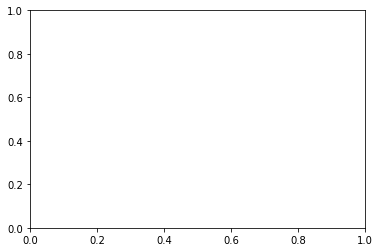

In [39]:
x_axis = df.iloc[:,5]
data = df.iloc[:,6]
plt.scatter(x_axis, data, marker="o", facecolors= "blue", edgecolors="black",alpha=0.75)
plt.title("City Latitude VS Max Temperature (03/22/2019)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

In [ ]:
plt.savefig("../Images/Temp.png")

ValueError: could not convert string to float: 

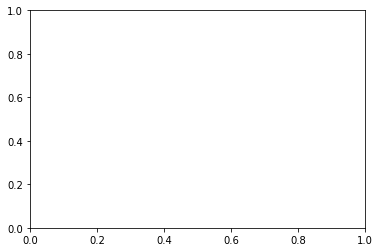

In [41]:
x_axis = df.iloc[:,5]
data = df.iloc[:,4]
plt.scatter(x_axis, data, marker="o", facecolors= "blue", edgecolors="black",alpha=0.75)
plt.title("City Latitude VS Humidity (03/22/2019)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

In [ ]:
plt.savefig("../Images/Humidity.png")

In [ ]:
x_axis = df.iloc[:,5]
data = df.iloc[:,1]
plt.scatter(x_axis, data, marker="o", facecolors= "blue", edgecolors="black",alpha=0.75)
plt.title("City Latitude VS Cloudiness (03/22/2019)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

In [ ]:
plt.savefig("../Images/Cloudiness.png")

In [ ]:
x_axis = df.iloc[:,5]
data = df.iloc[:,8]
plt.scatter(x_axis, data, marker="o", facecolors= "blue", edgecolors="black",alpha=0.75)
plt.title("City Latitude VS Wind Speed (03/22/2019)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

In [ ]:
plt.savefig("../Images/Wind.png")